In [4]:
import os
os.makedirs('ensemble', exist_ok=True)

# Split 7:3

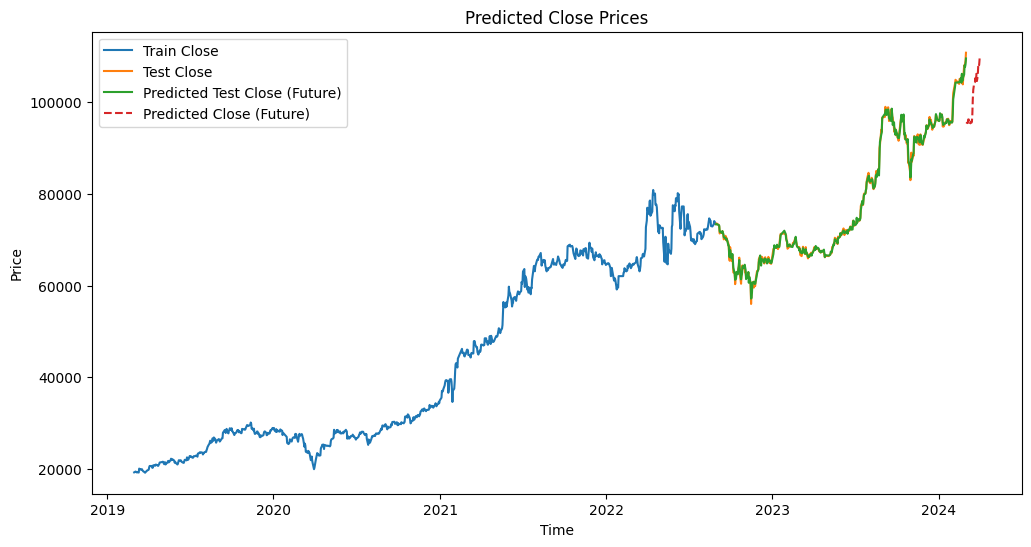

Mean Squared Logarithmic Error (MSLE): 0.5168976549404506
Mean Squared Error (MSE): 1425709726.834718
Root Mean Squared Error (RMSE): 37758.57156772113
Mean Absolute Percentage Error (MAPE): 93.71475716070324
R2 Score: -1.4733193738381845


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import joblib
from datetime import timedelta

# Load the data
data = pd.read_csv('../../Data/fpt_data_sheet.csv')

# Preprocessing
data['time'] = pd.to_datetime(data['time'])
X = data.drop(columns=['ticker', 'time', 'close'])
y = data['close']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the number of base estimators
n_estimators = 50

# Train Linear Regression models with Bootstrap Aggregating
lr_models = []
knn_models = []

for _ in range(n_estimators):
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bagging = X_train[indices]
    y_bagging = y_train.iloc[indices]
    
    lr_model = LinearRegression()
    lr_model.fit(X_bagging, y_bagging)
    lr_models.append(lr_model)
    
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X_bagging, y_bagging)
    knn_models.append(knn_model)

train_index = int(len(data) * 0.7)
test_size = int(len(data) - train_index)

# Predictions from all base models
lr_predictions_test = np.array([model.predict(X_test) for model in lr_models])

lr_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in lr_models])
knn_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in knn_models])

# Average the predictions from all base models
predictions_test_avg = np.mean([lr_predictions_test, knn_predictions_test], axis=0)

# Predict the next 30 days
# Assuming X_scaled has shape (num_samples, num_features)
num_days_to_add = 30
additional_days = np.arange(1, num_days_to_add + 1).reshape(-1, 1)  # Generate additional days

# Repeat the last row of X_scaled num_days_to_add times
last_X_scaled_row = X_scaled[-1:]
additional_X_scaled = np.repeat(last_X_scaled_row, num_days_to_add, axis=0)

# Concatenate the additional days with X_scaled
X_scaled_extended = np.concatenate((X_scaled, additional_X_scaled), axis=0)


X_future = X_scaled[-30:]  # Assuming the last 30 rows are the future data
lr_predictions_future = np.array([model.predict(X_future) for model in lr_models])
knn_predictions_future = np.array([model.predict(X_future) for model in knn_models])

predictions_future_avg = np.mean([lr_predictions_future, knn_predictions_future], axis=0)

# Generate future dates
last_date = data['time'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Prepare data for plotting

train_dates = data['time'][:train_index]
test_dates = data['time'][train_index:]
predicted_dates = future_dates

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y[:train_index], label='Train Close')
plt.plot(test_dates, y[train_index:], label='Test Close')
plt.plot(test_dates, np.mean(predictions_test_avg, axis=0), label='Predicted Test Close (Future)')
plt.plot(predicted_dates, np.mean(predictions_future_avg, axis=0), label='Predicted Close (Future)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Close Prices')
plt.legend()
plt.show()

# Evaluation Metrics
mse = mean_squared_error(y_test, np.mean(predictions_test_avg, axis=0))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, np.mean(predictions_test_avg, axis=0)) * 100
r2 = r2_score(y_test, np.mean(predictions_test_avg, axis=0))

# Calculate MSLE
msle = mean_squared_log_error(y_test, np.mean(predictions_test_avg, axis=0))

# Print MSLE
print("Mean Squared Logarithmic Error (MSLE):", msle)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score:", r2)


# Split 8:2

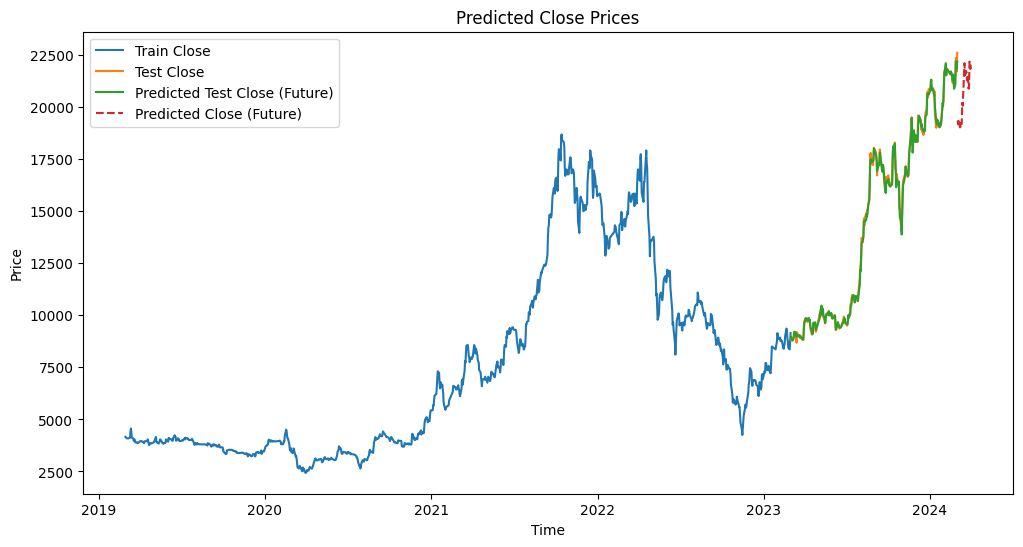

Mean Squared Logarithmic Error (MSLE): 0.9635133341716141
Mean Squared Error (MSE): 86985389.93625976
Root Mean Squared Error (RMSE): 9326.59583858225
Mean Absolute Percentage Error (MAPE): 158.72582568601734
R2 Score: -1.8138321476752552


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_squared_log_error
import joblib
from datetime import timedelta

# Load the data
data = pd.read_csv('../../Data/elc_data_sheet.csv')

# Preprocessing
data['time'] = pd.to_datetime(data['time'])
X = data.drop(columns=['ticker', 'time', 'close'])
y = data['close']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80% train,20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the number of base estimators
n_estimators = 50

# Train Linear Regression models with Bootstrap Aggregating
lr_models = []
knn_models = []

for _ in range(n_estimators):
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bagging = X_train[indices]
    y_bagging = y_train.iloc[indices]
    
    lr_model = LinearRegression()
    lr_model.fit(X_bagging, y_bagging)
    lr_models.append(lr_model)
    
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X_bagging, y_bagging)
    knn_models.append(knn_model)

train_index = int(len(data) * 0.8)
test_size = int(len(data) - train_index)

# Predictions from all base models
lr_predictions_test = np.array([model.predict(X_test) for model in lr_models])

lr_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in lr_models])
knn_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in knn_models])

# Average the predictions from all base models
predictions_test_avg = np.mean([lr_predictions_test, knn_predictions_test], axis=0)

# Predict the next 30 days
# Assuming X_scaled has shape (num_samples, num_features)
num_days_to_add = 30
additional_days = np.arange(1, num_days_to_add + 1).reshape(-1, 1)  # Generate additional days

# Repeat the last row of X_scaled num_days_to_add times
last_X_scaled_row = X_scaled[-1:]
additional_X_scaled = np.repeat(last_X_scaled_row, num_days_to_add, axis=0)

# Concatenate the additional days with X_scaled
X_scaled_extended = np.concatenate((X_scaled, additional_X_scaled), axis=0)


X_future = X_scaled[-30:]  # Assuming the last 30 rows are the future data
lr_predictions_future = np.array([model.predict(X_future) for model in lr_models])
knn_predictions_future = np.array([model.predict(X_future) for model in knn_models])

predictions_future_avg = np.mean([lr_predictions_future, knn_predictions_future], axis=0)

# Generate future dates
last_date = data['time'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Prepare data for plotting

train_dates = data['time'][:train_index]
test_dates = data['time'][train_index:]
predicted_dates = future_dates

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y[:train_index], label='Train Close')
plt.plot(test_dates, y[train_index:], label='Test Close')
plt.plot(test_dates, np.mean(predictions_test_avg, axis=0), label='Predicted Test Close (Future)')
plt.plot(predicted_dates, np.mean(predictions_future_avg, axis=0), label='Predicted Close (Future)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Close Prices')
plt.legend()
plt.show()

# Evaluation Metrics
mse = mean_squared_error(y_test, np.mean(predictions_test_avg, axis=0))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, np.mean(predictions_test_avg, axis=0)) * 100
r2 = r2_score(y_test, np.mean(predictions_test_avg, axis=0))

# Calculate MSLE
msle = mean_squared_log_error(y_test, np.mean(predictions_test_avg, axis=0))

# Print MSLE
print("Mean Squared Logarithmic Error (MSLE):", msle)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score:", r2)


# Split 9:1

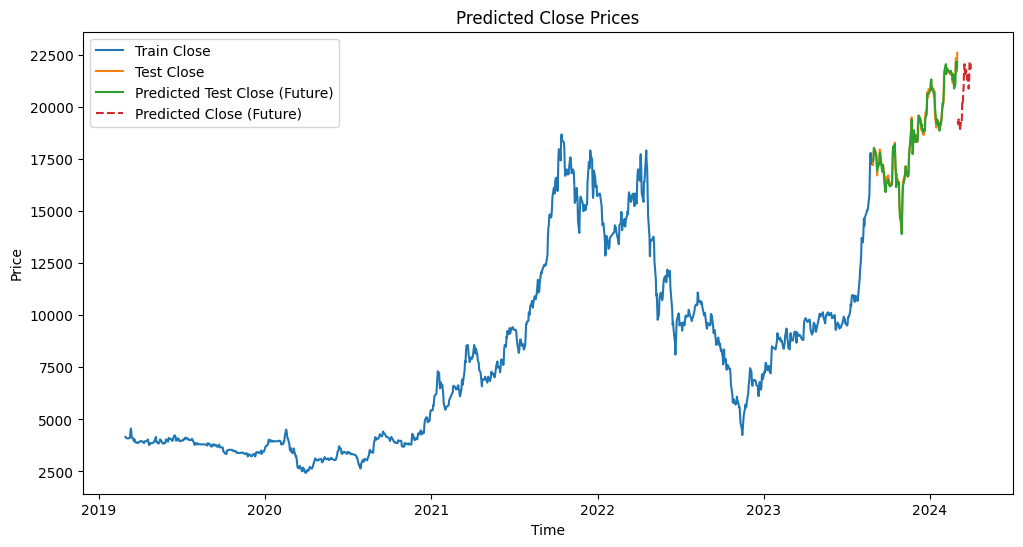

Mean Squared Logarithmic Error (MSLE): 1.231931567206629
Mean Squared Error (MSE): 124395871.64466013
Root Mean Squared Error (RMSE): 11153.28972297681
Mean Absolute Percentage Error (MAPE): 202.2755187972086
R2 Score: -2.785467254617786


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_squared_log_error
import joblib
from datetime import timedelta

# Load the data
data = pd.read_csv('../../Data/elc_data_sheet.csv')

# Preprocessing
data['time'] = pd.to_datetime(data['time'])
X = data.drop(columns=['ticker', 'time', 'close'])
y = data['close']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Define the number of base estimators
n_estimators = 50

# Train Linear Regression models with Bootstrap Aggregating
lr_models = []
knn_models = []

for _ in range(n_estimators):
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bagging = X_train[indices]
    y_bagging = y_train.iloc[indices]
    
    lr_model = LinearRegression()
    lr_model.fit(X_bagging, y_bagging)
    lr_models.append(lr_model)
    
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X_bagging, y_bagging)
    knn_models.append(knn_model)

train_index = int(len(data) * 0.9)
test_size = int(len(data) - train_index)

# Predictions from all base models
lr_predictions_test = np.array([model.predict(X_test) for model in lr_models])

lr_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in lr_models])
knn_predictions_test = np.array([model.predict(X_scaled[-test_size:]) for model in knn_models])

# Average the predictions from all base models
predictions_test_avg = np.mean([lr_predictions_test, knn_predictions_test], axis=0)

# Predict the next 30 days
# Assuming X_scaled has shape (num_samples, num_features)
num_days_to_add = 30
additional_days = np.arange(1, num_days_to_add + 1).reshape(-1, 1)  # Generate additional days

# Repeat the last row of X_scaled num_days_to_add times
last_X_scaled_row = X_scaled[-1:]
additional_X_scaled = np.repeat(last_X_scaled_row, num_days_to_add, axis=0)

# Concatenate the additional days with X_scaled
X_scaled_extended = np.concatenate((X_scaled, additional_X_scaled), axis=0)


X_future = X_scaled[-30:]  # Assuming the last 30 rows are the future data
lr_predictions_future = np.array([model.predict(X_future) for model in lr_models])
knn_predictions_future = np.array([model.predict(X_future) for model in knn_models])

predictions_future_avg = np.mean([lr_predictions_future, knn_predictions_future], axis=0)

# Generate future dates
last_date = data['time'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Prepare data for plotting

train_dates = data['time'][:train_index]
test_dates = data['time'][train_index:]
predicted_dates = future_dates

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y[:train_index], label='Train Close')
plt.plot(test_dates, y[train_index:], label='Test Close')
plt.plot(test_dates, np.mean(predictions_test_avg, axis=0), label='Predicted Test Close (Future)')
plt.plot(predicted_dates, np.mean(predictions_future_avg, axis=0), label='Predicted Close (Future)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Close Prices')
plt.legend()
plt.show()

# Evaluation Metrics
mse = mean_squared_error(y_test, np.mean(predictions_test_avg, axis=0))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, np.mean(predictions_test_avg, axis=0)) * 100
r2 = r2_score(y_test, np.mean(predictions_test_avg, axis=0))

# Calculate MSLE
msle = mean_squared_log_error(y_test, np.mean(predictions_test_avg, axis=0))

# Print MSLE
print("Mean Squared Logarithmic Error (MSLE):", msle)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score:", r2)
